In [2]:
import data as d
import datachar as dc
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
import torch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


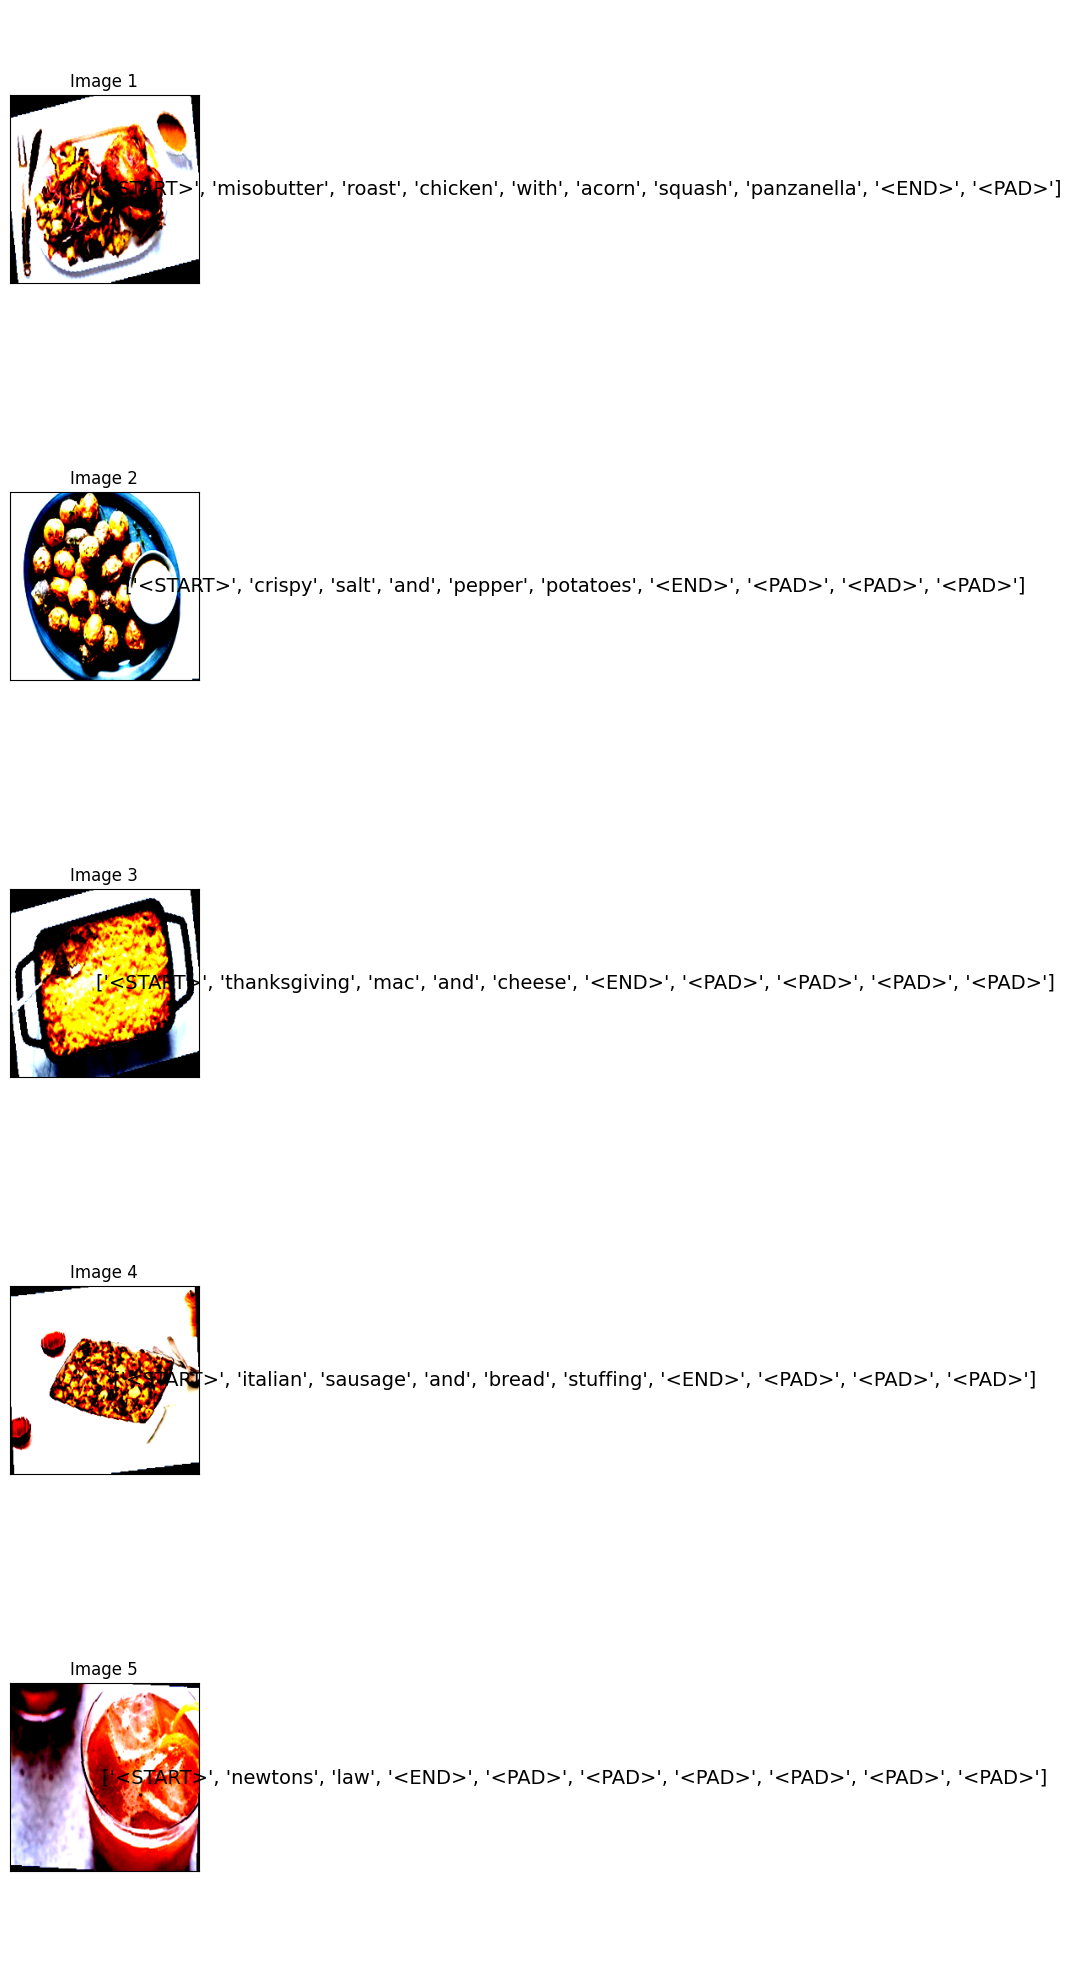

In [3]:
def visualization(dataset, num_of_images):
    count = 1
    fig = plt.figure(figsize=(10, 20))
    
    # Loop through a subset of images
    for idx in range(num_of_images):
        # Get image and caption from the dataset
        image, caption = dataset[idx]

        # Convert the image tensor to a format suitable for visualization
        if isinstance(image, torch.Tensor):
            image = image.permute(1, 2, 0)  # Convert (C, H, W) to (H, W, C)
            image = image.numpy()

        # Create the subplot for the image
        ax = fig.add_subplot(num_of_images, 2, count, xticks=[], yticks=[])
        ax.imshow(image)
        ax.set_title(f"Image {idx+1}", fontsize=12)
        count += 1
        
        # Create subplot for captions
        ax = fig.add_subplot(num_of_images, 2, count)
        plt.axis('off')  # Hide axes
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

        caption = d.dataset.vocab.decode(caption.numpy())  # Decodificar el tensor

        # Display the caption as a string
        ax.text(0.5, 0.5, caption, ha='center', fontsize=14, verticalalignment='center')
        count += 1
    
    plt.tight_layout()  # Ensure no overlap and proper spacing between subplots
    plt.show()

# Ejecución de ejemplo
visualization(d.dataset, 5)


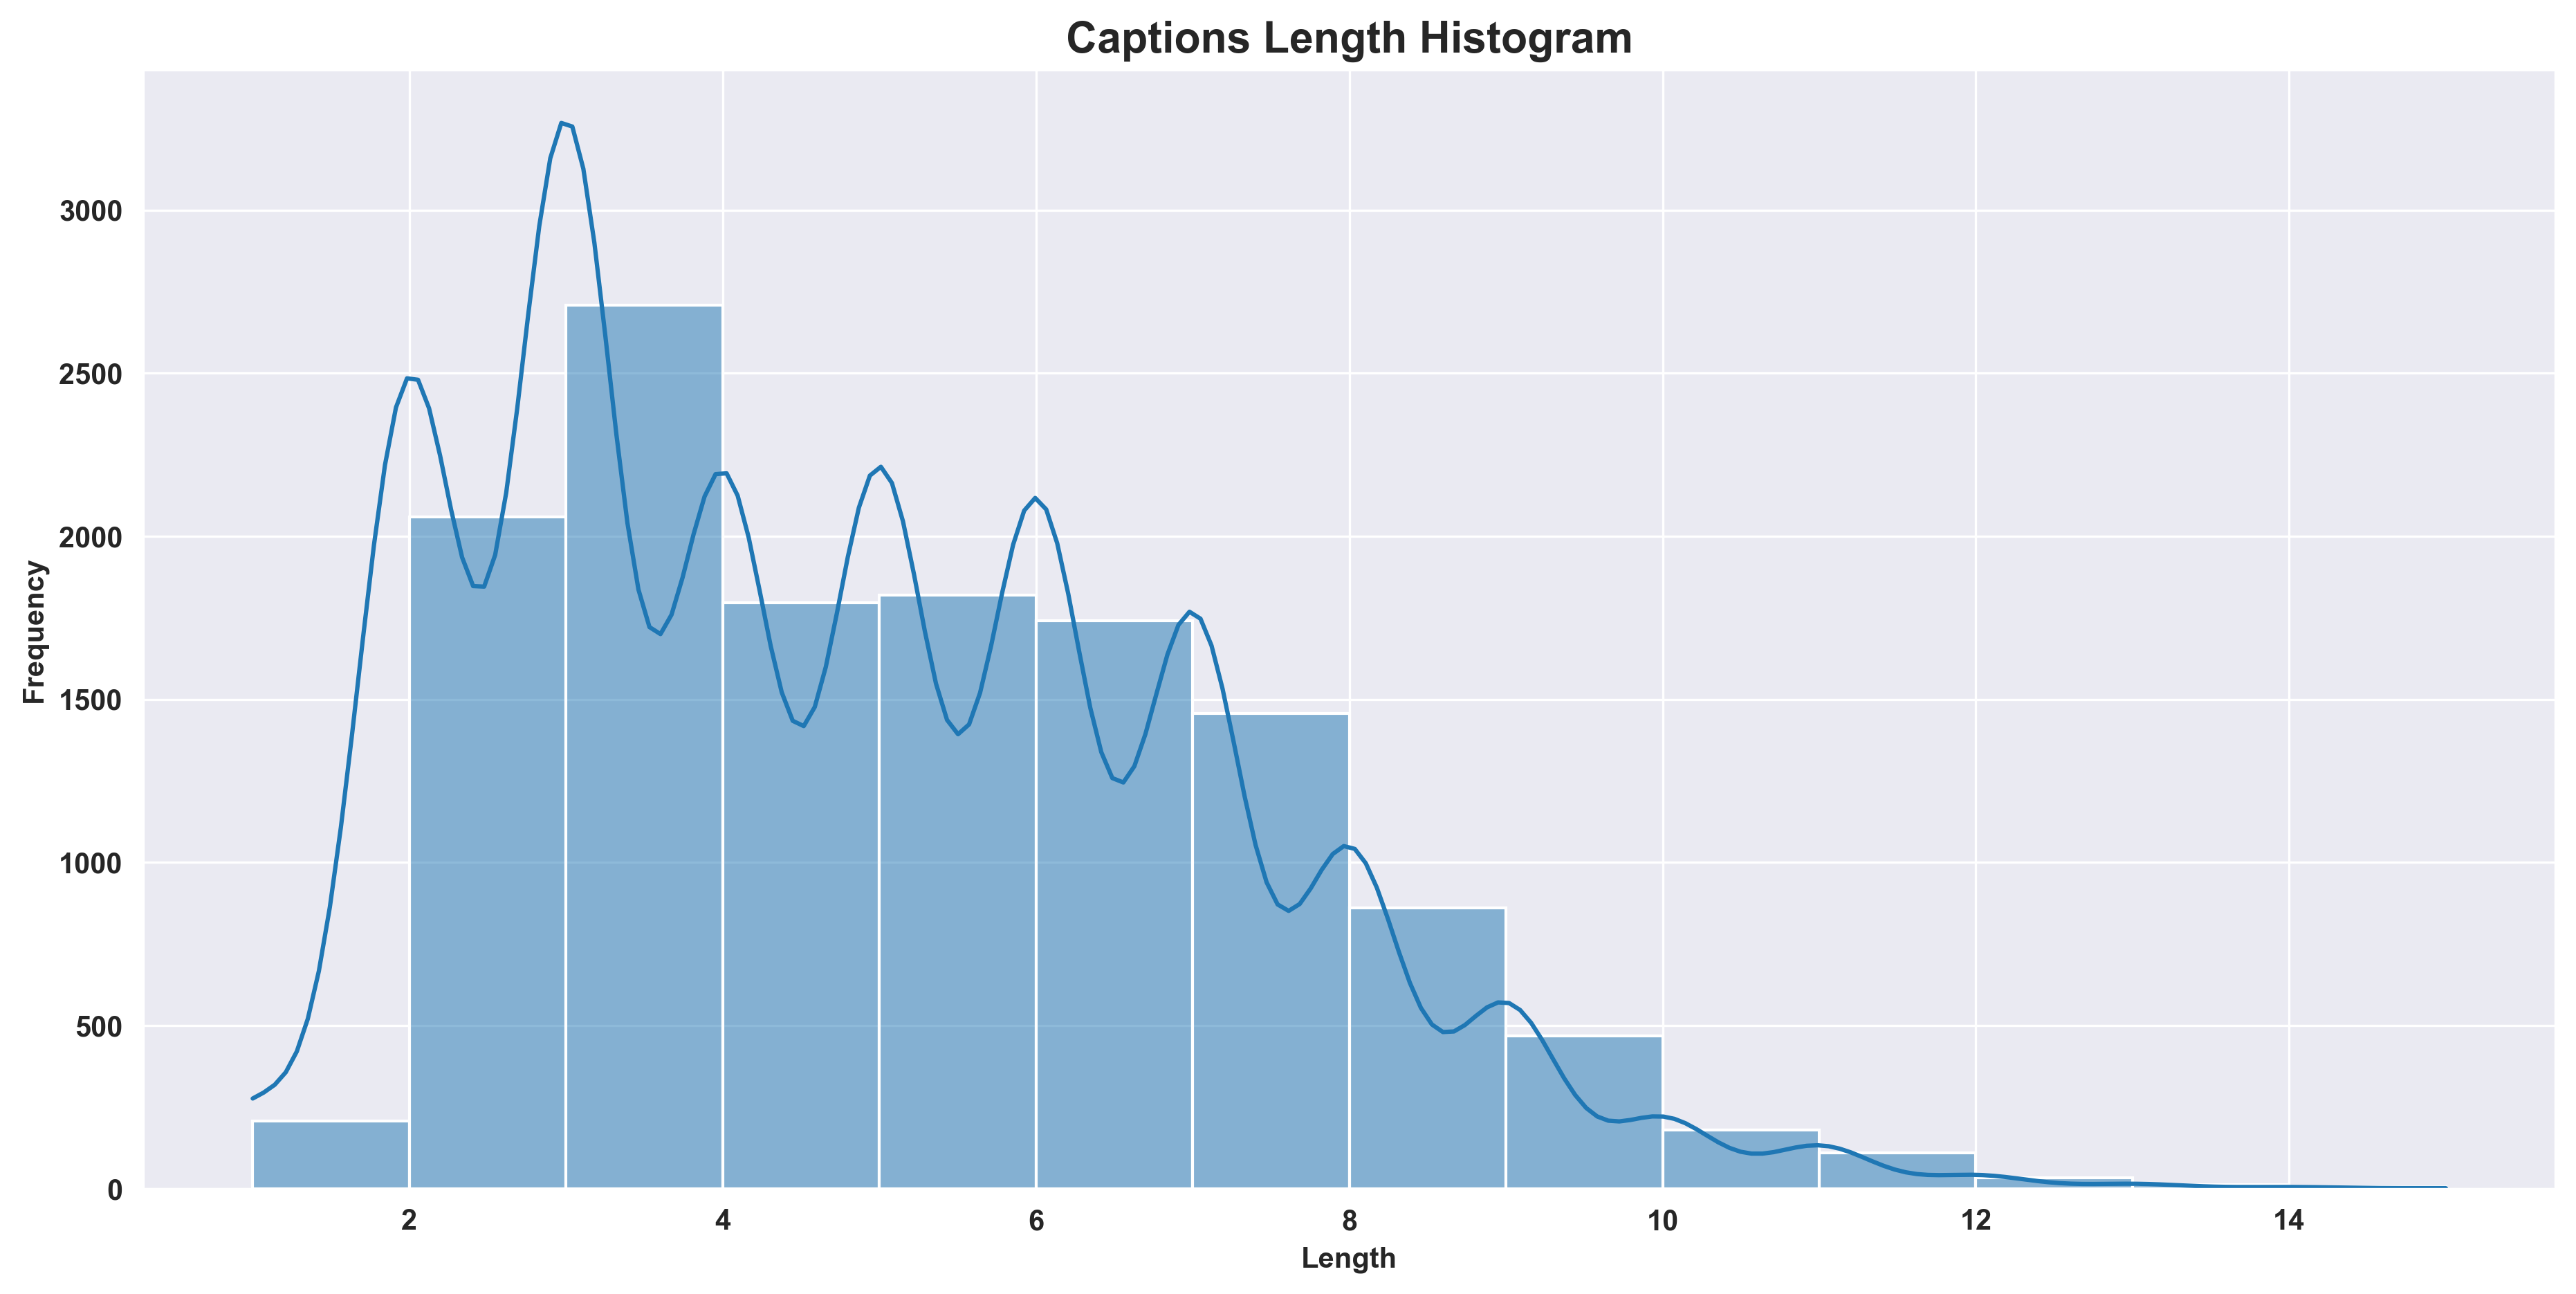

In [4]:
import seaborn as sns

def captions_length(data):
    # Verificar que la entrada sea una lista de textos
    if not isinstance(data, list):
        print("Error: Se esperaba una lista de cadenas de texto.")
        return
    
    plt.figure(figsize=(15, 7), dpi=300)
    sns.set_style('darkgrid')
    
    # Longitudes de captions
    lengths = [len(x.split()) for x in data if isinstance(x, str)]
    
    sns.histplot(x=lengths, kde=True, binwidth=1) 
    plt.title('Captions Length Histogram', fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.xlabel('Length', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.show()

# Ejemplo de uso
text_data = d.dataset.data['Title'].tolist()
captions_length(text_data)


In [5]:
from collections import Counter
import numpy as np
import plotly.graph_objects as go

def word_occurrences(data):
    # Validación de entrada
    if not isinstance(data, list) or not all(isinstance(x, str) for x in data):
        print("Error: Se esperaba una lista de cadenas de texto.")
        return

    # Combinar todas las frases en una sola cadena
    all_text = ' '.join(data).lower()
    #all_text = all_text.replace('a ', '')
    all_text = all_text.replace('<start> ', '')
    all_text = all_text.replace('<end> ', '')

    # Contar ocurrencias de palabras
    word_counts = Counter(all_text.split())

    # Extraer palabras y ocurrencias principales
    words = list(word_counts.keys())[:10]
    values = list(word_counts.values())[:10]

    # Normalizar valores para colores
    normalized_values = np.array(values) / np.max(values)
    colors = ['rgba(30, 58, 138, {:.2f})'.format(0.4 + 0.5 * val) for val in normalized_values]

    # Crear gráfico de pastel
    fig = go.Figure(data=[go.Pie(
        labels=words, 
        values=values, 
        hole=.6, 
        marker=dict(colors=colors), 
        textinfo='label+percent'
    )])

    # Configurar diseño del gráfico
    fig.update_layout(
        title_text="Word Occurrences in Captions", 
        title_font=dict(size=23, family='Balto')
    )

    fig.show()

# Ejemplo de uso
text_data = d.dataset.data['Title'].tolist()
word_occurrences(text_data)


In [7]:
print(d.dataset.vocab.word2idx)
print(d.dataset.vocab.idx2word)

{'<PAD>': 0, '<UNK>': 1, '<START>': 2, '<END>': 3, 'misobutter': 4, 'roast': 5, 'chicken': 6, 'with': 7, 'acorn': 8, 'squash': 9, 'panzanella': 10, 'crispy': 11, 'salt': 12, 'and': 13, 'pepper': 14, 'potatoes': 15, 'thanksgiving': 16, 'mac': 17, 'cheese': 18, 'italian': 19, 'sausage': 20, 'bread': 21, 'stuffing': 22, 'newtons': 23, 'law': 24, 'warm': 25, 'comfort': 26, 'apples': 27, 'oranges': 28, 'turmeric': 29, 'hot': 30, 'toddy': 31, 'instant': 32, 'pot': 33, 'lamb': 34, 'haleem': 35, 'spiced': 36, 'lentil': 37, 'caramelized': 38, 'onion': 39, 'baked': 40, 'eggs': 41, 'pimento': 42, 'dip': 43, 'spiral': 44, 'ham': 45, 'in': 46, 'the': 47, 'slow': 48, 'cooker': 49, 'butternut': 50, 'apple': 51, 'soup': 52, 'caesar': 53, 'salad': 54, 'rice': 55, 'leeks': 56, 'salsa': 57, 'verde': 58, 'gorditas': 59, 'con': 60, 'camarones': 61, 'enfrijoladas': 62, 'plantain': 63, 'parfait': 64, 'potato': 65, 'gratin': 66, 'brown': 67, 'butter': 68, 'cream': 69, 'roasted': 70, 'beets': 71, 'sunchokes': 

In [1]:
import matplotlib.pyplot as plt
import torch
import datachar as dc

# Verificar las captions tokenizadas
for i in range(5):  # Mostrar 5 muestras
    _, caption_indices = dc.dataset[i]  # Obtén imagen y caption tokenizada
    decoded_caption = dc.dataset.vocab.decode(caption_indices.tolist())
    print(f"Original: {dc.dataset.data.iloc[i]['Title']}")
    print(f"Tokenizada: {decoded_caption}")
    print("-" * 50)


Original: Miso-Butter Roast Chicken With Acorn Squash Panzanella
Tokenizada: ['<SOS>', 'm', 'i', 's', 'o', '-', 'b', 'u', 't', 't', 'e', 'r', ' ', 'r', 'o', 'a', 's', 't', ' ', 'c', 'h', 'i', 'c', 'k', 'e', 'n', ' ', 'w', 'i', 't', 'h', ' ', 'a', 'c', 'o', 'r', 'n', ' ', 's', 'q', 'u', 'a', 's', 'h', ' ', 'p', 'a', 'n', 'z', 'a', 'n', 'e', 'l', 'l', 'a', '<EOS>', '<PAD>', '<PAD>']
--------------------------------------------------
Original: Crispy Salt and Pepper Potatoes
Tokenizada: ['<SOS>', 'c', 'r', 'i', 's', 'p', 'y', ' ', 's', 'a', 'l', 't', ' ', 'a', 'n', 'd', ' ', 'p', 'e', 'p', 'p', 'e', 'r', ' ', 'p', 'o', 't', 'a', 't', 'o', 'e', 's', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
--------------------------------------------------
Original: Thanksgiving Mac and Cheese
Tokenizada: ['<SOS>', '

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


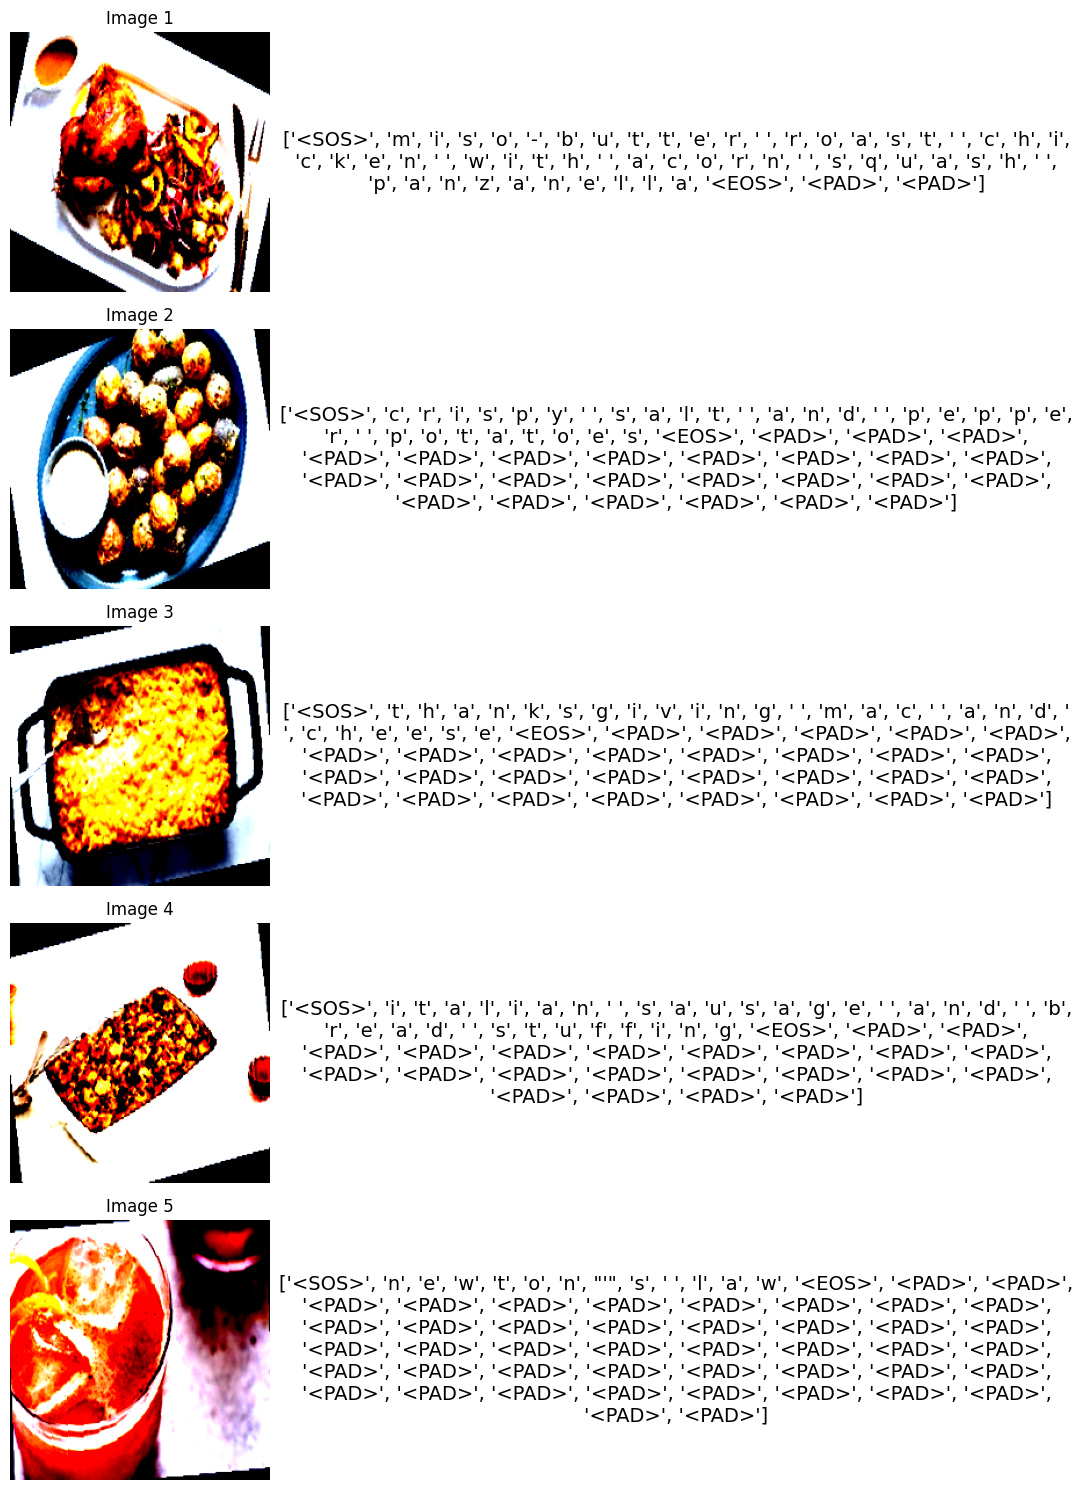

In [2]:
def visualization(dataset, num_of_images):
    fig, axes = plt.subplots(num_of_images, 2, figsize=(12, num_of_images * 3))
    
    # Asegurarse de que axes sea una matriz 2D
    if num_of_images == 1:
        axes = [axes]
        
    for idx in range(num_of_images):
        image, caption_indices = dataset[idx]

        # Convertir imagen a formato visualizable
        if isinstance(image, torch.Tensor):
            image = image.permute(1, 2, 0).numpy()  # Convertir a (H, W, C)

        # Mostrar imagen
        ax_img, ax_caption = axes[idx]
        ax_img.imshow(image)
        ax_img.axis('off')
        ax_img.set_title(f"Image {idx+1}", fontsize=12)

        # Decodificar y mostrar leyenda
        caption_text = dataset.vocab.decode(caption_indices.tolist())
        ax_caption.axis('off')
        ax_caption.text(
            0.5, 0.5, caption_text, ha='center', va='center', 
            wrap=True, fontsize=14
        )

    plt.tight_layout()
    plt.show()

# Ejecución de ejemplo
visualization(dc.dataset, 5)  # Mostrar 5 imágenes y sus captions

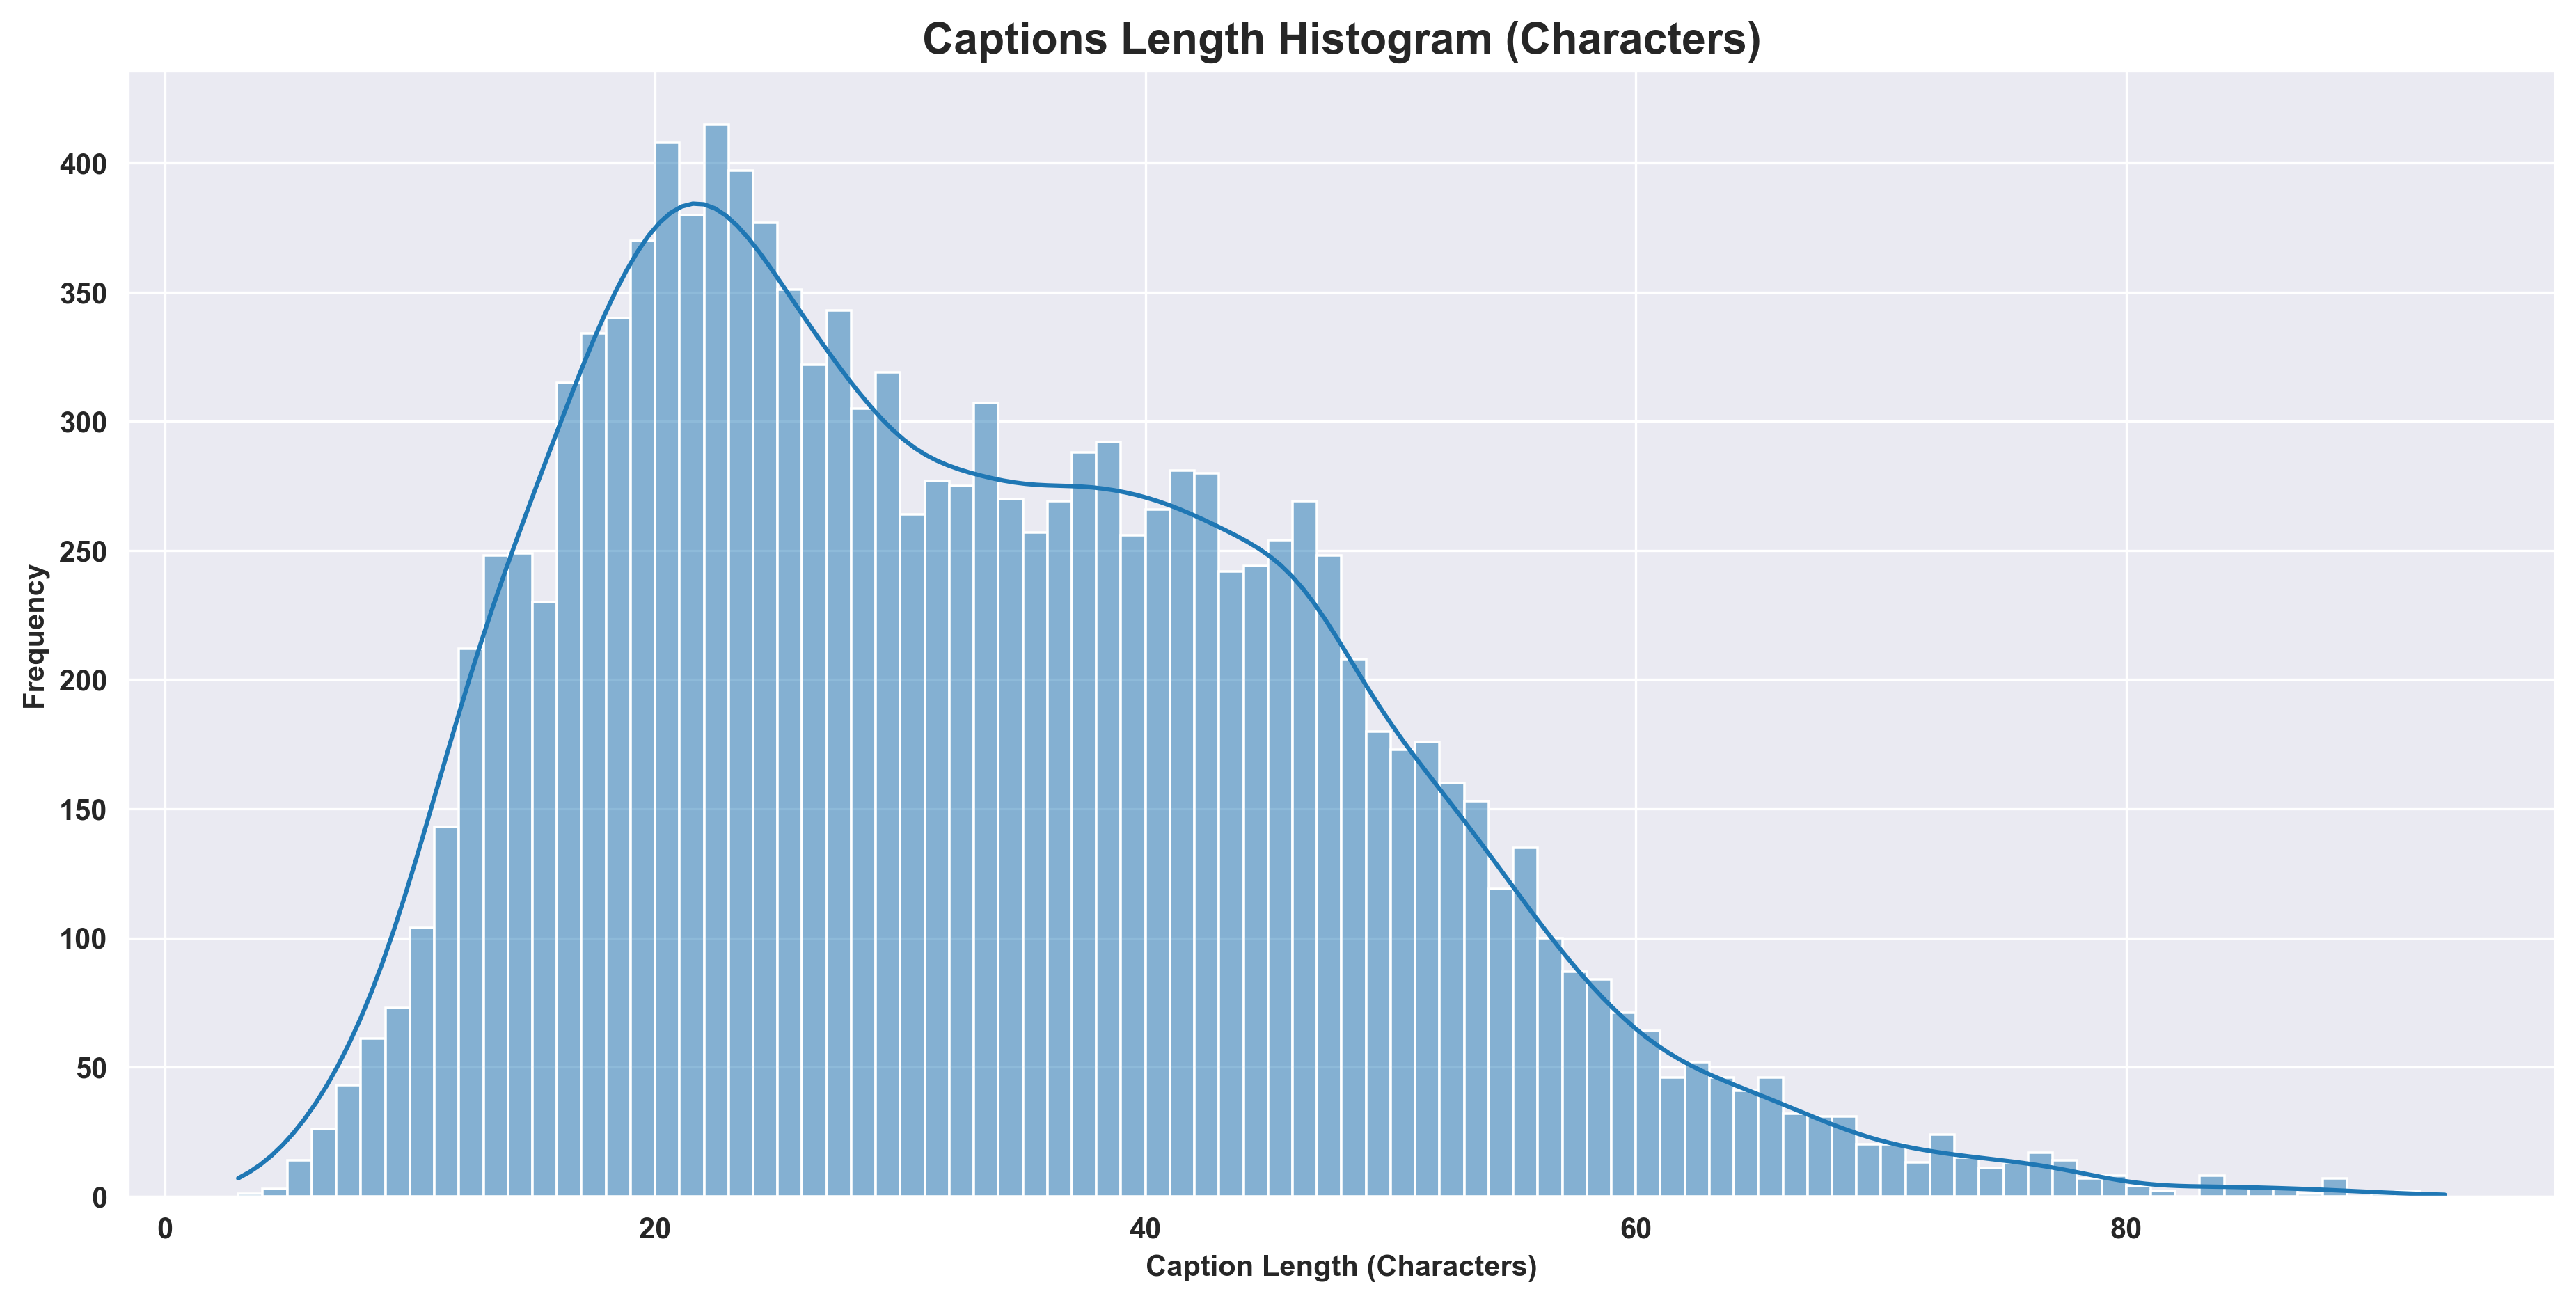

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def captions_length(data):
    """
    Muestra un histograma de la longitud de las captions en caracteres.
    """
    # Verificar que la entrada sea una lista de textos
    if not isinstance(data, list):
        print("Error: Se esperaba una lista de cadenas de texto.")
        return
    
    plt.figure(figsize=(15, 7), dpi=300)
    sns.set_style('darkgrid')
    
    # Longitudes de captions en caracteres
    lengths = [len(x) for x in data if isinstance(x, str)]
    
    sns.histplot(x=lengths, kde=True, binwidth=1) 
    plt.title('Captions Length Histogram (Characters)', fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.xlabel('Caption Length (Characters)', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.show()

captions_data = dc.dataset.data['Title'].tolist()  # Extraer las captions del dataset
captions_length(captions_data)


In [7]:
from collections import Counter
import numpy as np
import plotly.graph_objects as go

def char_occurrences(data):
    # Validación de entrada
    if not isinstance(data, list) or not all(isinstance(x, str) for x in data):
        print("Error: Se esperaba una lista de cadenas de texto.")
        return

    # Concatenar todos los títulos y limpiar etiquetas
    all_text = ''.join(data).lower()
    all_text = all_text.replace('<start>', '').replace('<end>', '')

    # Contar ocurrencias de caracteres
    char_counts = Counter(all_text)

    # Extraer caracteres y ocurrencias principales
    chars = [char for char, _ in char_counts.most_common(10)]
    values = [count for _, count in char_counts.most_common(10)]

    # Normalizar valores para colores
    normalized_values = np.array(values) / np.max(values)
    colors = ['rgba(30, 58, 138, {:.2f})'.format(0.4 + 0.5 * val) for val in normalized_values]

    # Crear gráfico de pastel
    fig = go.Figure(data=[go.Pie(
        labels=chars, 
        values=values, 
        hole=.6, 
        marker=dict(colors=colors), 
        textinfo='label+percent'
    )])

    # Configurar diseño del gráfico
    fig.update_layout(
        title_text="Character Occurrences in Captions", 
        title_font=dict(size=23, family='Balto')
    )

    fig.show()

# Ejemplo de uso
text_data = dc.dataset.data['Title'].tolist()
char_occurrences(text_data)


In [12]:
print(dc.dataset.vocab.char2idx)
print(dc.dataset.vocab.idx2char)

{'<SOS>': 0, '<EOS>': 1, '<PAD>': 2, '<UNK>': 3, ' ': 4, '!': 5, '"': 6, '#': 7, '&': 8, "'": 9, '(': 10, ')': 11, ',': 12, '-': 13, '.': 14, '0': 15, '1': 16, '2': 17, '3': 18, '4': 19, '5': 20, '6': 21, '7': 22, '8': 23, '9': 24, ':': 25, ';': 26, '=': 27, '?': 28, 'A': 29, 'B': 30, 'C': 31, 'D': 32, 'E': 33, 'F': 34, 'G': 35, 'H': 36, 'I': 37, 'J': 38, 'K': 39, 'L': 40, 'M': 41, 'N': 42, 'O': 43, 'P': 44, 'Q': 45, 'R': 46, 'S': 47, 'T': 48, 'U': 49, 'V': 50, 'W': 51, 'X': 52, 'Y': 53, 'Z': 54, 'a': 55, 'b': 56, 'c': 57, 'd': 58, 'e': 59, 'f': 60, 'g': 61, 'h': 62, 'i': 63, 'j': 64, 'k': 65, 'l': 66, 'm': 67, 'n': 68, 'o': 69, 'p': 70, 'q': 71, 'r': 72, 's': 73, 't': 74, 'u': 75, 'v': 76, 'w': 77, 'x': 78, 'y': 79, 'z': 80, 'é': 81, '’': 82, 'ó': 83, 'è': 84, '된': 85, '장': 86, '찌': 87, '개': 88, '/': 89, '닭': 90, '강': 91, '정': 92, '–': 93, '́': 94, '파': 95, '전': 96, 'î': 97, 'ñ': 98, 'í': 99, 'á': 100, 'с': 101, 'ы': 102, 'р': 103, 'н': 104, 'и': 105, 'к': 106, 'ú': 107, '“': 108, '”'